## DATA SCIENTIST CAPSTONE PROJET ##

## Step 1: Explore the Dataset ##

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\HP\Desktop\Project\Data Science Capstone Project\CAR DETAILS.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## Step 2: Data Cleaning & Pre-Processing

In [7]:
# Check for missing values and handle them
print("Missing Values Before Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [8]:
# Drop or fill missing values
df.dropna(inplace=True)  # Dropping missing rows (alternatively use fillna() if applicable)
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [9]:
# Handle duplicates
df.drop_duplicates(inplace=True)
print("Dataset shape after removing duplicates:", df.shape)


Dataset shape after removing duplicates: (3577, 8)


In [10]:
# Convert categorical data to numeric (One-Hot Encoding)
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [11]:
# Scaling numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Data After Cleaning and Pre-Processing:")
print(df.head())


Data After Cleaning and Pre-Processing:
       year  selling_price  km_driven  name_Ambassador Classic 2000 Dsz  \
0 -1.402566      -0.812819   0.015754                             False   
1 -1.402566      -0.665538  -0.404650                             False   
2 -0.226418       0.247604   0.646360                             False   
3  0.949731      -0.439708  -0.488731                             False   
4  0.244042      -0.046958   1.508188                             False   

   name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
0                                      False                  False   
1                                      False                  False   
2                                      False                  False   
3                                      False                  False   
4                                      False                  False   

   name_Audi A4 2.0 TDI  name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0           

## Step 3: Exploratory Data Analysis (EDA)


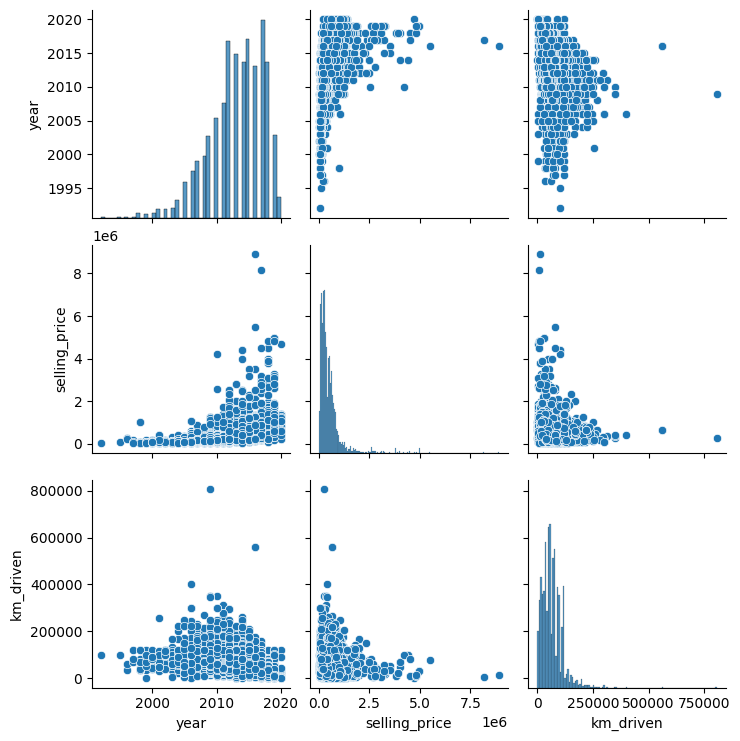

In [3]:
# Pairplot to explore relationships
sns.pairplot(df)
plt.show()



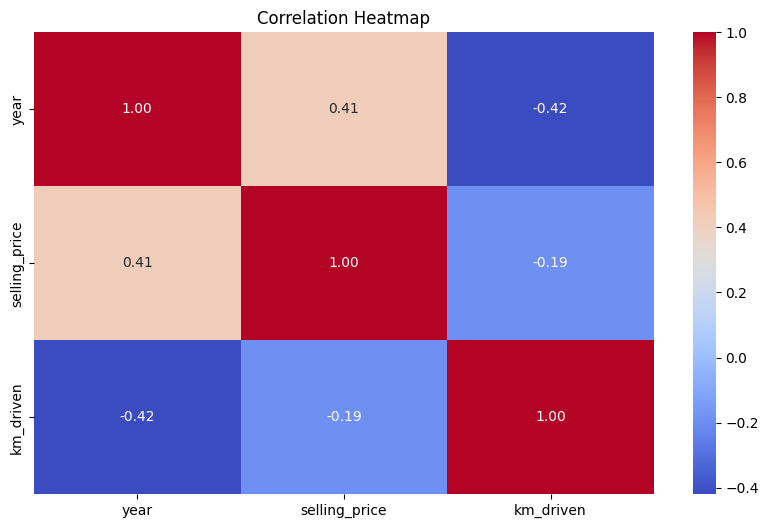

In [4]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


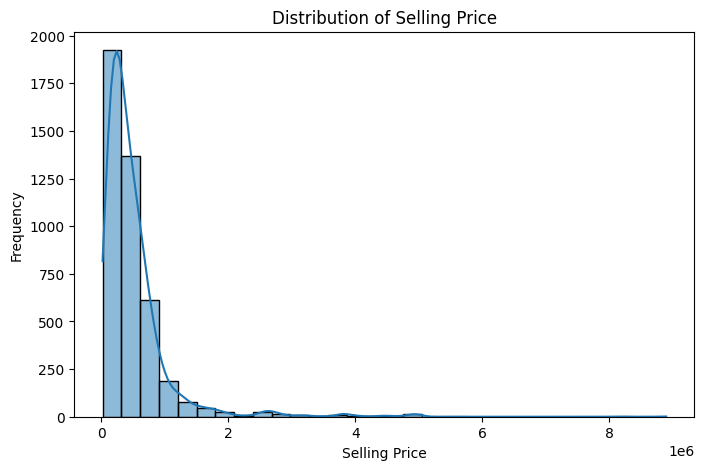

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [5]:
# Visualize target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()
print(df.columns)


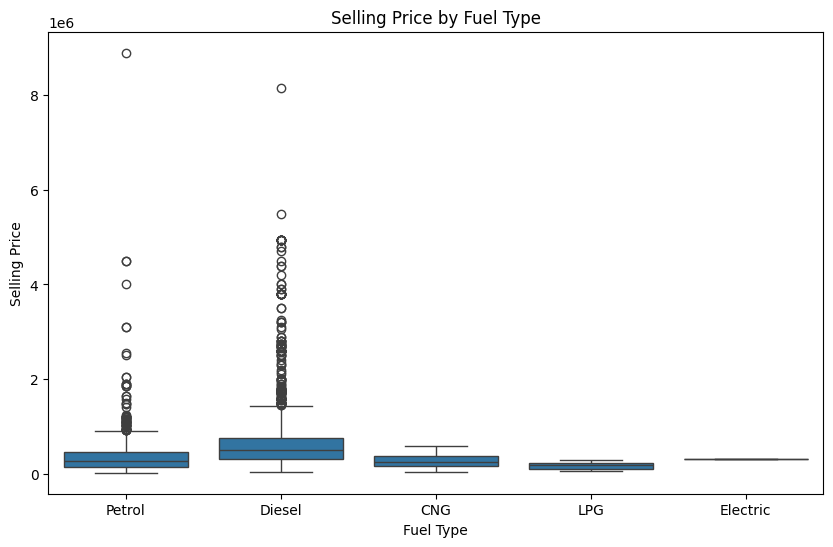

In [6]:
# Boxplot for Selling Price vs. Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fuel'], y=df['selling_price'])
plt.title("Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()


## Step 4: Machine Learning Model


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
print(df.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [9]:
# Splitting data into features (X) and target (y)
X = df.drop('selling_price', axis=1)
y = df['selling_price']



In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display the first few predicted values
print("Predictions:", y_pred[:5])

ValueError: could not convert string to float: 'Mahindra Scorpio S11 BSIV'

## Apply One-Hot Encoding

In [12]:
# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the first few rows to verify encoding
print(df_encoded.head())


   year  selling_price  km_driven  name_Ambassador Classic 2000 Dsz  \
0  2007          60000      70000                             False   
1  2007         135000      50000                             False   
2  2012         600000     100000                             False   
3  2017         250000      46000                             False   
4  2014         450000     141000                             False   

   name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
0                                      False                  False   
1                                      False                  False   
2                                      False                  False   
3                                      False                  False   
4                                      False                  False   

   name_Audi A4 2.0 TDI  name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                 False                                      False   
1     

## Split the Data Again

In [17]:
X = df_encoded.drop('selling_price', axis=1)  # Replace 'selling_price' with your target column
y = df_encoded['selling_price']  # Your target variable

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Train the Random Forest Model

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
import os
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print first few predictions
print("Predictions:", y_pred[:5])


Predictions: [ 172650.          391379.99        123002.          457899.96
 1193411.48666667]


## Evaluate the Model

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 118178.46553648233
R-squared: 0.5750664656148172


## SAVE THE MODEL

In [48]:
# Ensure the directory exists before saving the model
model_directory = r'D:\user\Desktop\Capstone project\Data-Science-Capstone-Project'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the trained model using pickle
model_path = os.path.join(model_directory, 'car_price_modal.pkl')
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f'Model saved to {model_path}')

Model saved to C:\Users\HP\Desktop\Data Science Capstone Project\car_price_modal.pkl


In [49]:
model = joblib.load('best_model.pkl')


In [51]:
# Load the saved model
with open(r'C:\Users\HP\Desktop\Data Science Capstone Project\car_price_modal.pkl', 'rb') as model_file:
    model = pickle.load(model_file)



## Step 5: Create a Sample Dataset

In [38]:
# Create a random sample of 20 rows
sample_data = df.sample(20)
sample_data.to_csv("SampleDataset.csv", index=False)

# Apply the saved model
loaded_model = joblib.load('best_model.pkl')
predictions = loaded_model.predict(sample_data.drop('selling_price', axis=1))
print("Predictions on Sample Dataset:", predictions)




ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- fuel
- name
- owner
- seller_type
- transmission
Feature names seen at fit time, yet now missing:
- fuel_Diesel
- fuel_Electric
- fuel_LPG
- fuel_Petrol
- name_Ambassador Classic 2000 Dsz
- ...


In [39]:
sample_data = sample_data.reindex(columns=X_train.columns, fill_value=0)


In [40]:
sample_data_encoded = pd.get_dummies(sample_data)


In [41]:
missing_cols = set(X_train.columns) - set(sample_data.columns)
for col in missing_cols:
    sample_data[col] = 0  # or fill with a default value
sample_data = sample_data[X_train.columns]  # Reorder columns to match training data


In [42]:
sample_data = sample_data.fillna(0)  # Or use another imputation strategy


In [44]:
# Ensure the columns in sample_data match those in X_train
sample_data = sample_data.reindex(columns=X_train.columns, fill_value=0)

# If you used One-Hot Encoding during training, ensure the same encoding is applied to sample_data
sample_data_encoded = pd.get_dummies(sample_data)

# Handle missing columns by adding them back with default values if necessary
missing_cols = set(X_train.columns) - set(sample_data_encoded.columns)
for col in missing_cols:
    sample_data_encoded[col] = 0  # Fill missing columns with 0

# Reorder columns to ensure they match the training data
sample_data_encoded = sample_data_encoded[X_train.columns]

# Load the saved model
import joblib
loaded_model = joblib.load('best_model.pkl')

# Make predictions on the sample data
predictions = loaded_model.predict(sample_data_encoded)

# Print predictions
print("Predictions on Sample Dataset:", predictions)


Predictions on Sample Dataset: [399930.   481469.97 739589.96 530339.87 666189.91 558709.93 546110.
 759069.99 515380.   731500.   223389.99 627029.97 507179.94 591289.98
 482379.82 699039.99 382399.93 767059.99 552489.99 709489.97]
